In [1]:
pip install numpy pandas matplotlib tensorflow scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_csv('predict_energy_consumption.xls')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [4]:
X = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y = data['energy_consumption'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Mean Squared Error and Mean Absolute Error

In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 90224.2422 - mae: 272.9761 - val_loss: 83577.5391 - val_mae: 258.7907
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 87678.5625 - mae: 266.7847 - val_loss: 82899.8594 - val_mae: 257.4829
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 88848.1484 - mae: 269.2924 - val_loss: 81863.1172 - val_mae: 255.4676
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 86317.3047 - mae: 264.0828 - val_loss: 80316.9531 - val_mae: 252.4272
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 85349.4375 - mae: 262.3249 - val_loss: 78014.3281 - val_mae: 247.8273
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 86365.6875 - mae: 262.6260 - val_loss: 74837.0469 - val_mae: 241.3162
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 77898.4844 - mae: 247.7287 - val_loss: 70583.6719 - val_mae: 232.3057
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 74874.4219 - mae: 241.2856 - val_loss: 6

In [10]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17967.6914 - mae: 114.8633  
Test Mean Absolute Error: 114.87


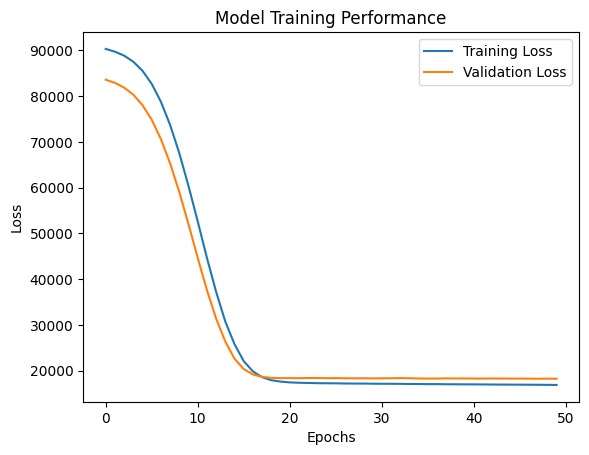

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [12]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[291.7331 ],
       [253.18132],
       [252.07797],
       [210.61308],
       [331.9938 ],
       [304.95593],
       [315.67358],
       [294.45178],
       [287.30347],
       [275.2281 ],
       [240.95212],
       [260.43384],
       [281.97263],
       [232.99283],
       [287.44165],
       [310.1938 ],
       [260.98676],
       [322.0513 ],
       [293.93066],
       [251.23132],
       [269.43155],
       [283.8888 ],
       [262.3986 ],
       [269.59216],
       [256.1471 ],
       [245.20308],
       [266.1834 ],
       [317.54013],
       [309.20984],
       [269.5298 ],
       [238.59425],
       [304.65472],
       [294.41522],
       [273.04684],
       [311.7915 ],
       [288.37738],
       [216.96768],
       [263.29547],
       [277.6846 ],
       [239.5621 ],
       [243.46385],
       [254.94305],
       [247.44873],
       [252.51819],
       [265.86975],
       [262.17755],
       [259.05023],
       [256.70605],
       [290.50012],
       [292.7047 ],


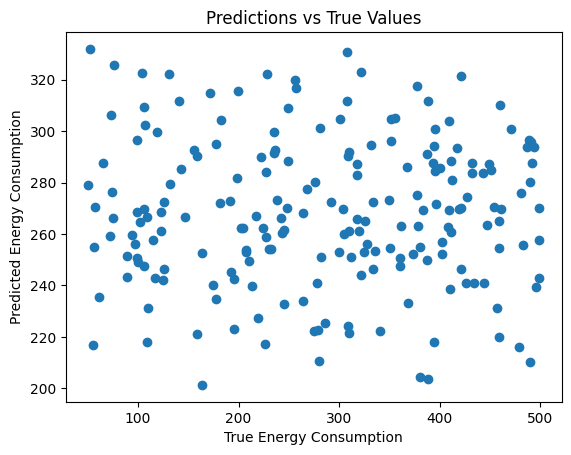

In [13]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()